In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import statistics

In [ ]:
df = pd.read_csv('/content/property_listing_data_in_Bangladesh.csv')
df.head()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [ ]:
df = df.drop('title', axis = 1)
df = df.drop('adress', axis = 1)
df = df.drop('type', axis = 1)
df = df.drop('purpose', axis = 1)
df = df.drop('flooPlan', axis = 1)
df = df.drop('url', axis = 1)
df = df.drop('lastUpdated', axis = 1)

In [ ]:
df

,beds,bath,area,price
0,3,4,"2,200 sqft",50 Thousand
1,3,4,"1,400 sqft",30 Thousand
2,3,4,"1,950 sqft",30 Thousand
3,3,3,"2,000 sqft",35 Thousand
4,3,4,"1,650 sqft",25 Thousand
...,...,...,...,...
7552,4,4,"3,600 sqft",80 Thousand
7553,3,2,900 sqft,19 Thousand
7554,2,2,"1,000 sqft",22 Thousand
7555,3,4,"3,600 sqft",1.75 Lakh


In [ ]:
df['bath'] = df['bath'].str.extract('(\d+)')
df['bath'] = pd.to_numeric(df['bath'])
df['beds'] = df['beds'].str.extract('(\d+)')
df['beds'] = pd.to_numeric(df['beds'])
df['area'] = df['area'].str.replace(',', '')
df['area'] = df['area'].str.extract('(\d+)')
df['area'] = pd.to_numeric(df['area'])

In [ ]:
import re

df['price'] = df['price'].apply(lambda x: float(re.findall(r'\d+\.\d+|\d+', x)[0]) * 100000.0 if 'Lakh' in x else float(re.findall(r'\d+\.\d+|\d+', x)[0]) * 1000)


In [ ]:
df.head(10)

,beds,bath,area,price
0,3,4,2200,50000.0
1,3,4,1400,30000.0
2,3,4,1950,30000.0
3,3,3,2000,35000.0
4,3,4,1650,25000.0
5,5,5,3400,110000.0
6,3,3,1600,35000.0
7,3,3,1250,23000.0
8,3,4,2150,40000.0
9,3,3,1250,23000.0


In [ ]:
new_data=df.to_numpy()

In [ ]:
new_data[0][2]

2200.0

In [ ]:
new_data

array([[3.00e+00, 4.00e+00, 2.20e+03, 5.00e+04],
       [3.00e+00, 4.00e+00, 1.40e+03, 3.00e+04],
       [3.00e+00, 4.00e+00, 1.95e+03, 3.00e+04],
       ...,
       [2.00e+00, 2.00e+00, 1.00e+03, 2.20e+04],
       [3.00e+00, 4.00e+00, 3.60e+03, 1.75e+05],
       [4.00e+00, 4.00e+00, 2.60e+03, 9.00e+04]])

In [ ]:
from sklearn.model_selection import train_test_split
def z_score_scaling(dataset):
    mean_vals = np.mean(dataset, axis=0)
    stdev_vals = np.std(dataset, axis=0)
    scaled_dataset = (dataset - mean_vals) / stdev_vals
    return scaled_dataset
modified_list=new_data
X=modified_list[:,:-1]
Y=modified_list[:,-1]
X=z_score_scaling(X)
X=np.array(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=1)
X_valid,X_test,y_valid,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=1)
print("Train data:", len(X_train))
print("Test data:", len(X_valid))
print("Validation data:", len(X_test))

Train data: 4534
Test data: 1511
Validation data: 1512


In [ ]:
X_train


array([[ 0.25164733,  0.34002476, -0.09619075],
       [ 1.27626956,  0.34002476,  0.65640181],
       [ 0.25164733, -0.76993944, -0.17981214],
       ...,
       [ 0.25164733,  1.44998896,  0.65640181],
       [ 1.27626956,  1.44998896,  2.22430297],
       [ 0.25164733,  0.34002476, -0.28433889]])

In [ ]:
initial_b = 10
initial_w = np.array([-600., -9000.0, 5000.0])
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [ ]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)

In [ ]:
import copy
def gradient_descent(X, y, w_in, b_in, cost, gradient, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        print(f"Training Loss: {compute_cost(X_train,y_train,w,b)}")
        print(f"Validation Loss: {compute_cost(X_valid,y_valid,w,b)}")
    return w, b

In [ ]:
init_w = np.zeros_like(initial_w)
print(init_w)
init_b = 1
iterations = 2000
alpha = 0.01
w_final, b_final = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(20):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

[0. 0. 0.]
Training Loss: 2813148056.5446415
Validation Loss: 2087486073.0333261
Training Loss: 2729427839.928401
Validation Loss: 2030038340.1377027
Training Loss: 2649670771.7505507
Validation Loss: 1975291218.8384461
Training Loss: 2573675640.33165
Validation Loss: 1923107705.5126026
Training Loss: 2501251691.5961933
Validation Loss: 1873357929.4069047
Training Loss: 2432218080.809965
Validation Loss: 1825918778.0082371
Training Loss: 2366403353.1560616
Validation Loss: 1780673542.1464825
Training Loss: 2303644951.6307116
Validation Loss: 1737511579.789597
Training Loss: 2243788750.8200307
Validation Loss: 1696327997.5454257
Training Loss: 2186688615.1949773
Validation Loss: 1657023348.9370341
Training Loss: 2132205980.6329844
Validation Loss: 1619503348.5671492
Training Loss: 2080209457.9436545
Validation Loss: 1583678601.3343728
Training Loss: 2030574457.2392905
Validation Loss: 1549464345.9075441
Training Loss: 1983182832.0531092
Validation Loss: 1516780211.70678
Training Loss: 1

In [ ]:
def predict(X,w,b,test):
  n=X.shape[0]
  for i in range(n):
    y_pred.append(np.dot(X[i],w)+b)
    print(str(i+1)+":","Predicted_value=",y_pred[i])
    print(" Actual_Value:",test[i])

In [ ]:
y_pred=[]
predict(X_test,w_final,b_final,y_test)
y_pred=np.array(y_pred)
print(y_pred.shape)
print(X_test.shape)

1: Predicted_value= 11856.916558656267
 Actual_Value: 8200.0
2: Predicted_value= -1862.9517312147873
 Actual_Value: 16000.0
3: Predicted_value= 4207.16134901387
 Actual_Value: 22000.0
4: Predicted_value= 21566.948936140132
 Actual_Value: 35000.0
5: Predicted_value= 159981.2233046001
 Actual_Value: 180000.0
6: Predicted_value= 25471.932380699283
 Actual_Value: 25000.0
7: Predicted_value= 57336.59728830197
 Actual_Value: 60000.0
8: Predicted_value= 15922.111682691335
 Actual_Value: 15000.0
9: Predicted_value= 89691.52130253537
 Actual_Value: 35000.0
10: Predicted_value= 56872.01161664842
 Actual_Value: 45000.0
11: Predicted_value= 9691.786922986761
 Actual_Value: 15000.0
12: Predicted_value= 12017.12823813218
 Actual_Value: 12000.0
13: Predicted_value= 302.177904454722
 Actual_Value: 15000.0
14: Predicted_value= 5626.591798951697
 Actual_Value: 45000.0
15: Predicted_value= 76236.71715996828
 Actual_Value: 50000.0
16: Predicted_value= 12017.12823813218
 Actual_Value: 16000.0
17: Predicted

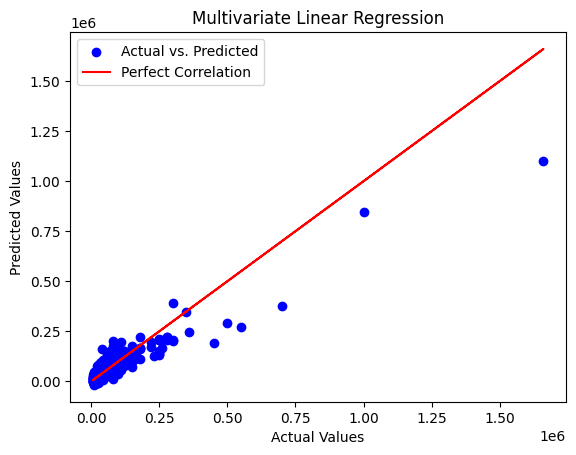

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of Actual vs. Predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Plotting the perfect correlation line
plt.plot(y_test, y_test, color='red', label='Perfect Correlation')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multivariate Linear Regression')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("Accuracy:",r2*100,"%")

Accuracy: 82.00662684958023 %


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 815499057.99


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


R-squared: 0.82
